# Linear Models - Data Science Assignment 2

# Contents

- <a href='#1'>1. Abstract</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1 Data Cleaning</a>
    - <a href='#2.2'>2.2 Data Visualization and Multi-colinearity Check</a>
- <a href='#3'>3. Part A - Linear model</a> 
- <a href='#4'>4. Part B - Logistic model</a> 
- <a href='#5'>5. Part C - Multi-colinearity and step-wise Regression</a> 
- <a href='#6'>6. Part D - Interaction effects</a>
- <a href='#7'>7. Part E - L2 Regularization</a>
- <a href='#8'>8. Conclusion</a>
- <a href='#9'>9. Contributions statement</a>
- <a href='#10'>10. Citations</a>
- <a href='#11'>11. License</a>

# <a id='1'>1. Abstract</a>

**The purpose of this notebook is to create predictive linear model using both linear and logistic regression. The dataset used is taken from the UCI Machine Learning Repository related to white wine quality. The task is to predict quality of wine based on several parameters, generate different models by taking multiple and different columns into consideration and analyze the models**



# <a id='2'>2. Exploratory Data Analysis</a>

<a id="2.1">****2.1 Data Cleaning****</a>


## Auditing and cleansing the loaded data
In this task, we are inspecting and auditind the data to identify the data problems, and then fix the problems. Different generic and major data problems could be found in the data might include:
* Lexical errors, e.g., typos and spelling mistakes
* Irregularities, e.g., abnormal data values and data formats
* Violations of the Integrity constraint.
* Outliers
* Duplications
* Missing values
* Inconsistency, e.g., inhomogeneity in values and types in representing the same data

**Importing Libraries**<br>
Python environment comes with number of in-build analytical purpose libraries following are some of the libraries that will be required along with brief description of certain Libraries

In [1]:
# importing libraries
import matplotlib.pyplot as plt #Used to make change to a figure (Create, Plot, Decorate) 
import numpy as np              # Linear Algebra Library    
import pandas as pd             # Data Processing, CSV file Input/Output
from scipy import stats         #Statistical Functions
import seaborn as sns           # visualization tool
import warnings                 # Ignore Future Warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from patsy import dmatrices     # To find out data matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check variance inflation Factor

import statsmodels.api as sm #Statistics
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score # divide the data into train test and split
#Perform and build linear, Logistic Model and calculate ridge factor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge 
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
#Cross Validation usinf Kfold
from sklearn.model_selection import KFold

import os 
print(os.listdir("..")) #List the files in the root directory
# Any results you write to the current directory are saved as output.

['.DS_Store', '.gitignore', 'assignment-1-cassian-gonsalves', 'assignment-2-cassian-gonsalves', 'assignment-3-kaggle-cassian-gonsalves', 'hyperparameter-db-project-ds18']


**Importing Data Set**

**Source:** The Dataset is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ which is an open source free machine learning Data set repository. 


In [2]:
# importing the dataset .csv file from root folder
df_white=pd.read_csv("winequality-white.csv")

In [3]:
#Lists the top 5 records in the imported csv dataset file
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#Changing column names: replacing empty spaces with _ to avoid programming bugs
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)



In [5]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Finding the range of alcohol to divide it into multiclass variable
min(df_white["alcohol"]), max(df_white["alcohol"])

(8.0, 14.2)

In [6]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Checking for nan/empty values**

In [7]:
df_white.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_white.describe()

#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
print("white mean = ",df_white["quality"].mean()) #checking the mean of the quality

white mean =  5.87790935075541


Nothing looks particularly out of place that is there are no empty values/negitive values etc

<a id="2.2">****2.2 Data Visualization and Multi-colinearity Check****</a><br>

Spearman correlation is used as there are ordinal data present in the dataset

**Checking the correlation between different factors by plotting heat maps**

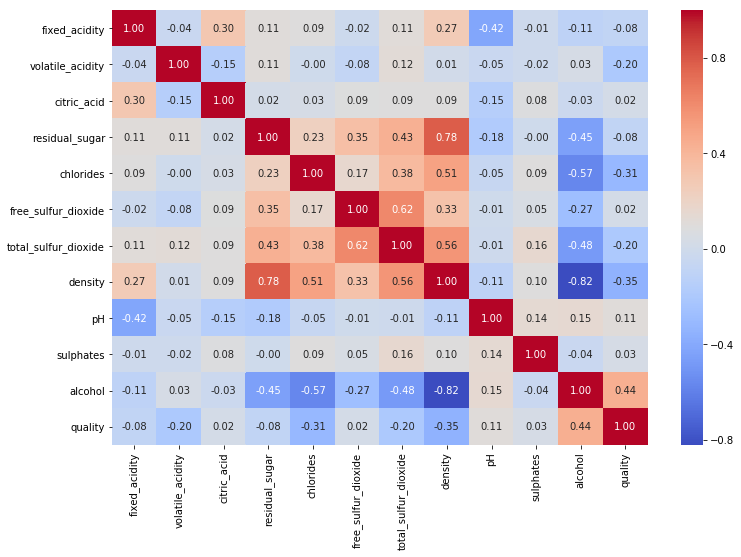

In [10]:
corrmat = df_white.corr()
# Plotting heatmaps to check for factors that affect the most to GDP
plt.figure(figsize=(12,8))

#Generate Heat Map, allow annotations and place floats in map

sns.heatmap(df_white.corr(method='spearman'),   # iloc-> primary integer position
            annot=True,                  # annot-> numerical representation
            fmt='.2f',cmap='coolwarm')  # String formatting code to use when adding annotations(fmt='.2f' -> till 2 decimals))           



**Correlation among variables**
<ul>
<li>Quality is moderately correlated with alcohol</li>
<li>Alcohol is moderately correlated with the density of wine apart from being moderaltely correlated with quality</li>
<li>Density is strongly correlated with residual sugar quantity and moderately correlated with pH</li>
<li>Free sulfur dioxide and total sulfur dioxide are strongly correlated</li>
</ul>


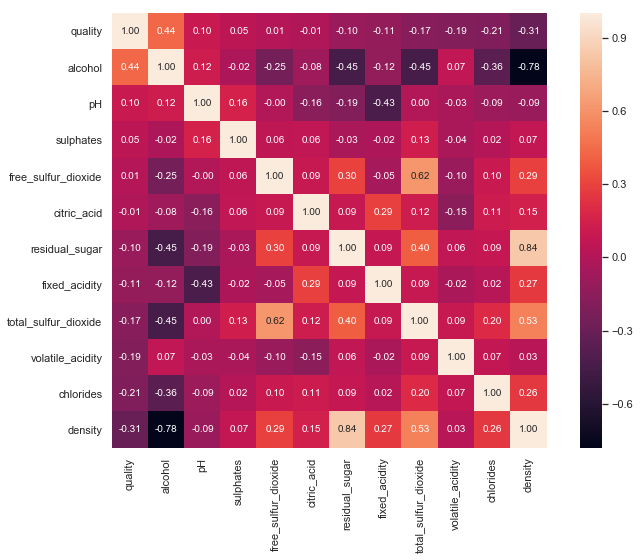

In [11]:
plt.figure(figsize=(12,8))
k = 100 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df_white[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,quality
1,alcohol
2,pH
3,sulphates
4,free_sulfur_dioxide
5,citric_acid
6,residual_sugar
7,fixed_acidity
8,total_sulfur_dioxide
9,volatile_acidity


Thus we have to drop either one of the following to avoid multi-colinearity while building the models
1. Free sulfur dioxide and total sulfur dioxide
2. Density is strongly and sugar quantity

**Plotting pairplots with help of seaborn to plot the regression between different features and target for better selection of parameters**

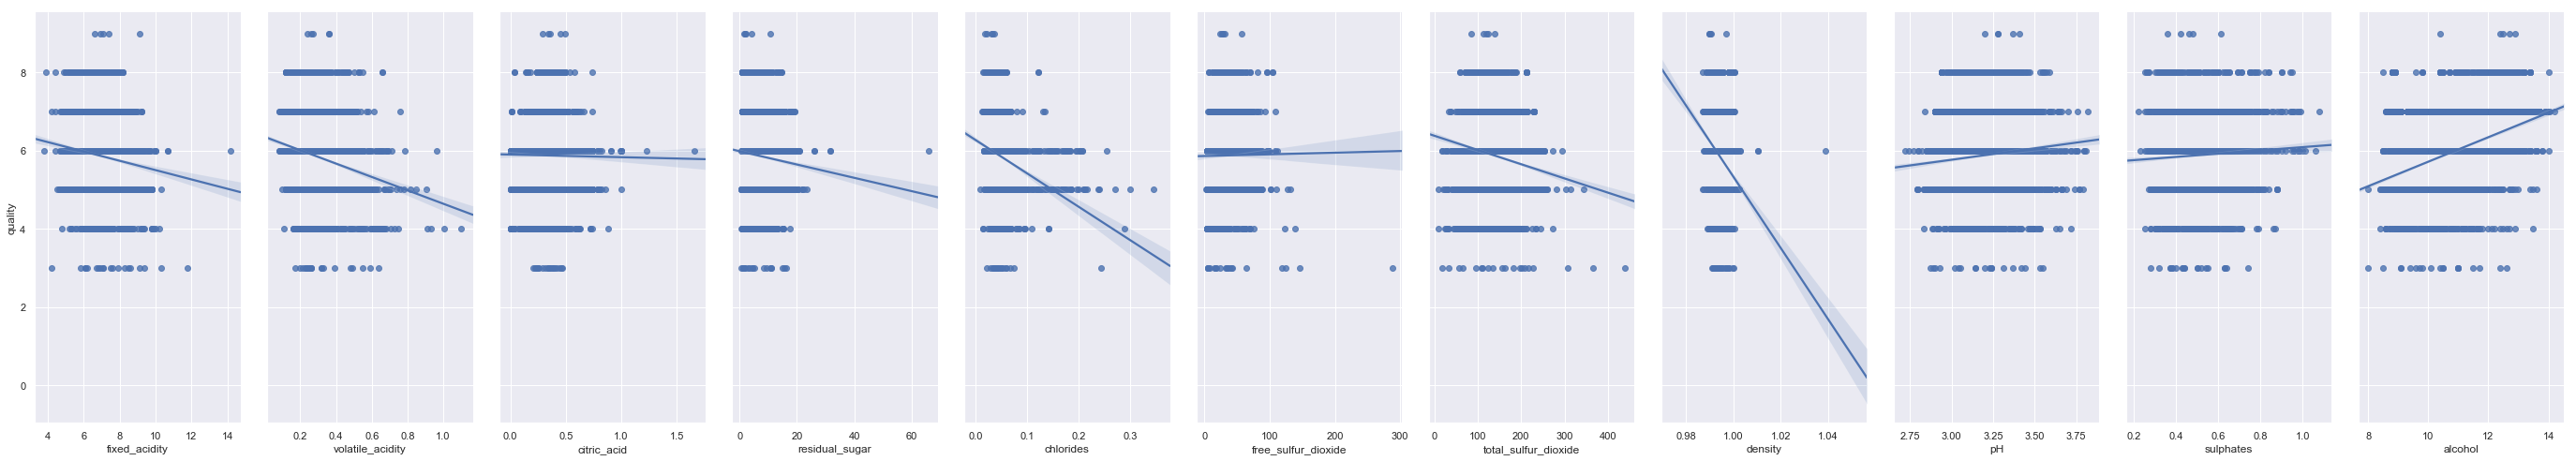

In [13]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = df_white[features]
y = df_white['quality']
#plotting features vs quality
sns.pairplot(df_white,x_vars=features,y_vars='quality',kind='reg',height=7,aspect=0.5)

**Preparing the data as per the requirement**<br>

In [14]:
df_white['quality'].unique() #checking unique values

array([6, 5, 7, 8, 4, 3, 9])

In [15]:
#count of each target variable
from collections import Counter
Counter(df_white['quality'])

Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})

we will also convert the values of Alcohol into multiclass that is is the alcohol is less than equal to 10 we will convert it into 1 else less than equal to 12 to 2 and greater than 12 to 3 that is high alcohol content 

In [16]:
alcoholmc = []
for i in df_white['alcohol']:
    if i <= 10:
        alcoholmc.append(1)
    elif i >10 and i <= 12:
        alcoholmc.append(2)
    elif i > 12 and i <= 15:
        alcoholmc.append(3)
df_white['AlcoholMc'] = alcoholmc
df_white['Reviews']=df_white['quality'].apply(lambda x: 0 if x <= 6 else 1)


In [17]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
AlcoholMc               4898 non-null int64
Reviews                 4898 non-null int64
dtypes: float64(11), int64(3)
memory usage: 535.8 KB


****

# <a id='3'>3. Linear model</a>

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too

****

**Model 1**

The data is split into training data and testing data, which is fit into the model the model predicts certain output based on training data which is then tested against the target data.

We will be using mean squared error to check the accuracy of the predictions<br>
<br>
General steps to calculate the mean squared error from a set of X and Y values:<br>
<br>
Find the regression line.<br>
Insert your X values into the linear regression equation to find the new Y values (Y’).<br>
Subtract the new Y value from the original to get the error.<br>
Square the errors.<br>
Add up the errors.<br>
Find the mean.

**In thi model I have considered all the factors to check the accuracy, this model has multi-colinear factors as well which we will remove in the further model but first we meed to chek if this model makes an impact**

In [18]:
#splitting data for traning and testing
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'AlcoholMc']

y= df_white['quality']
X=df_white[features]


In [19]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     172.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                -5551.3
No. Observations:                4898   AIC:                         1.113e+04
Df Residuals:                    4886   BIC:                         1.120e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  208.9111     13.770     15.171      0.000     181.916     235.907
fixed_acidity            0.1080      0.019      5.798      0.000       0.072       0.145
volatile_acidity        -1.7837      0.113    -15.820      0.000      -2.005      -1.563
citric_acid              0.0376      0.096      0.393      0.695      -0.150       0.226
residual_sugar           0.1013      0.006     16.593      0.000       0.089       0.113
chlorides               -0.1889      0.548     -0.345      0.730      -1.262       0.885
free_sulfur_dioxide      0.0034      0.001      4.064      0.000       0.002       0.005
total_sulfur_dioxide    -0.0002      0.000     -0.441      0.659      -0.001       0.001
density               -208.7820     14.106    -14.801      0.000    -236.437    -181.127
pH                       0.8758      0.096      9.096      0.000       0.687       1.065
sulphates                0.7245      0.099      7.348      0.000       0.531       0.918
AlcoholMc                0.2098      0.030      6.965      0.000       0.151       0.269
==============================================================================
Omnibus:                      131.649   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.919
Skew:                           0.088   Prob(JB):                     1.37e-67
Kurtosis:                       4.216   Cond. No.                     2.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance for this reason we need to validate the model<br><br>**

**This process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data, is known as validation**

In [20]:
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

R2 0.2450457675143662
Mean RMSE 0.7627614059797655


The model worked perfectly fine since the mean square error is so close to 0 we can say that this is a good model with all significant relations and assumptions are not violated.AIC and BIC is significantly less and adjusted R2 is 0.134 which is same as R2. Value of mean RMSE is close to 0 and R-squared is nearly linear, we can say that the cross-validation did well. let us check if we can improve it more.

****

**Model 2**<br>
From the above ols regression results we can make out that that the p values for few features are more tha 0.05 so dropping those features in the below model to get more accuracy and avoid multicolinearity

In [21]:
#splitting data for traning and testing
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
        'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'AlcoholMc']

y= df_white['quality']
X=df_white[features]

In [22]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     237.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                -5551.5
No. Observations:                4898   AIC:                         1.112e+04
Df Residuals:                    4889   BIC:                         1.118e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 210.9013     13.071     16.136      0.000     185.277     236.525
fixed_acidity           0.1103      0.018      6.092      0.000       0.075       0.146
volatile_acidity       -1.8037      0.108    -16.643      0.000      -2.016      -1.591
residual_sugar          0.1021      0.006     17.380      0.000       0.091       0.114
free_sulfur_dioxide     0.0032      0.001      4.749      0.000       0.002       0.005
density              -210.8214     13.382    -15.754      0.000    -237.057    -184.586
pH                      0.8787      0.094      9.308      0.000       0.694       1.064
sulphates               0.7239      0.098      7.384      0.000       0.532       0.916
AlcoholMc               0.2109      0.030      7.028      0.000       0.152       0.270
==============================================================================
Omnibus:                      132.681   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.240
Skew:                           0.089   Prob(JB):                     2.60e-68
Kurtosis:                       4.222   Cond. No.                     7.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

R2 0.24628043051733767
Mean RMSE 0.7621067920680988


The model worked perfectly fine since the mean square error is so close to 0 we can say that this is a good model with all significant relations and assumptions are not violated.AIC and BIC is significantly less and adjusted R2 is 0.132 which is same as R2. Value of mean RMSE is close to 0 and R-squared is nearly linear, we can say that the cross-validation did well. let us check if we can improve it more by dropping certain factors with low correlation.

****

**Model 3**<br>
In this model I am going to use the random features based on correlation as training data and Reviews as target data

In [24]:
#splitting data for traning and testing
features = ['fixed_acidity', 'residual_sugar','sulphates',
       'chlorides', 'AlcoholMc']

y = df_white['quality']
X = df_white[features]


In [25]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     234.6
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          3.78e-225
Time:                        12:01:47   Log-Likelihood:                -5828.3
No. Observations:                4898   AIC:                         1.167e+04
Df Residuals:                    4892   BIC:                         1.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2810      0.122     43.351      0.000       5.042       5.520
fixed_acidity     -0.0768      0.014     -5.654      0.000      -0.103      -0.050
residual_sugar     0.0154      0.002      6.247      0.000       0.011       0.020
sulphates          0.5035      0.100      5.047      0.000       0.308       0.699
chlorides         -2.9396      0.555     -5.293      0.000      -4.028      -1.851
AlcoholMc          0.5308      0.019     28.049      0.000       0.494       0.568
==============================================================================
Omnibus:                       71.437   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.719
Skew:                           0.035   Prob(JB):                     1.52e-29
Kurtosis:                       3.803   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

R2 0.164934147650343
Mean RMSE 0.8020687654691357


From the above built 3 models we can conclude that the relationship is significant since we got a R square value close enough to 0, result from all models which means the data is accurate and the model built works great. No assumptions are violated since there is hardly a few percent diffirence of the accuracy among the models hence the assumptions are perfectly fine. In the last model we didnot get warning for multi-colinearity hence it was removed as well<br><br>

The model worked perfectly fine since the mean square error is so close to 0 we can say that this is a good model with all significant relations and assumptions are not violated.AIC and BIC is significantly less and adjusted R2 is 0.132 which is same as R2. Value of mean RMSE is close to 0 and R-squared is nearly linear, so far this model worked the best.

****

# <a id='4'>4. Logistic model</a>

**Model 1**<br>

**We shall create a new column called Review. This column will contain the values of 0 and 1 for target variable** 

0 - Bad<br>
1 - Good<br>
This will be split in the following way.<br> 
Less than 6 --> Bad<br>
Greater than 6 --> Good<br>

In [27]:
df_white['Reviews']=df_white['quality'].apply(lambda x: 0 if x <= 6 else 1)

In [28]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

logistic_y_model1 = df_white['Reviews']
logistic_X_model1 = df_white[features]

In [29]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(logistic_X_model1, logistic_y_model1, test_size= 0.4, random_state=0)


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import KFold

# Logistic regression cross validation
Kfold = KFold(n_splits=5, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(model,logistic_X_model1, logistic_y_model1 ,cv=10).mean())

lr = model.fit(X_train,y_train)


KfoldCrossVal mean score using Logistic regression is 0.7964392137222988


In [31]:
model.predict_proba(X_test)

array([[0.91307494, 0.08692506],
       [0.91921529, 0.08078471],
       [0.80509562, 0.19490438],
       ...,
       [0.96226348, 0.03773652],
       [0.8128537 , 0.1871463 ],
       [0.89334142, 0.10665858]])

In [32]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1473   57]
 [ 343   87]]


In [33]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
model.coef_

array([[-0.1719466 , -3.08856964, -0.56176795,  0.02900354, -1.10024856,
         0.01407933, -0.0038175 , -3.55841528, -0.40108474,  0.86485389,
         0.80814002]])

In [35]:
lr.decision_function(X_test) # Predict confidence scores for samples.

array([-2.35177159, -2.43173271, -1.41845198, ..., -3.23866003,
       -1.46866046, -2.1253359 ])

In [36]:
from sklearn import metrics
y_pred = lr.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.7959183673469388


##### We have an accuracy of 80% approximately which is average , let us check if we can improve it more by reducing training attributes or selecting more accurate attributes

****

**Model 2**<br>

In [37]:
#splitting data for traning and testing
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'pH', 'free_sulfur_dioxide', 'sulphates', 'AlcoholMc']

logistic_y_model1 = df_white['Reviews']
logistic_X_model1 = df_white[features]

In [38]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(logistic_X_model1, logistic_y_model1, test_size= 0.4, random_state=0)


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import KFold

# Logistic regression cross validation
Kfold = KFold(n_splits=5, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(model,logistic_X_model1, logistic_y_model1 ,cv=10).mean())

lr = model.fit(X_train,y_train)

KfoldCrossVal mean score using Logistic regression is 0.7911268311005384


In [40]:
model.predict_proba(X_test)

array([[0.85277195, 0.14722805],
       [0.94342645, 0.05657355],
       [0.7489172 , 0.2510828 ],
       ...,
       [0.95668711, 0.04331289],
       [0.88853988, 0.11146012],
       [0.89209708, 0.10790292]])

In [41]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1446   84]
 [ 333   97]]


In [42]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
model.coef_

array([[-0.17827194, -2.81199797,  0.00998105, -1.349967  , -0.15164584,
         0.00975727,  0.78390652,  1.41648877]])

In [44]:
lr.decision_function(X_test) # Predict confidence scores for samples.

array([-1.75650943, -2.81397692, -1.09284564, ..., -3.0950262 ,
       -2.07591264, -2.11234299])

In [45]:
from sklearn import metrics
y_pred = lr.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.7872448979591836


There was a minor decrease in the accuacy so the prediction of the factors might not be perfectly right lets move ahead and make another model

****

**Model 3**<br>
In this model I am going to use the random features based on correlation as training data and Reviews as target data

In [46]:
features = ['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide','sulphates',
       'chlorides', 'pH', 'AlcoholMc']

logistic_y_model1 = df_white['Reviews']
logistic_X_model1 = df_white[features]

In [47]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(logistic_X_model1, logistic_y_model1, test_size= 0.4, random_state=0)


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import KFold

# Logistic regression cross validation
Kfold = KFold(n_splits=5, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(model,logistic_X_model1, logistic_y_model1 ,cv=10).mean())

lr = model.fit(X_train,y_train)

KfoldCrossVal mean score using Logistic regression is 0.7956120362255332


In [49]:
model.predict_proba(X_test)

array([[0.83704362, 0.16295638],
       [0.93445431, 0.06554569],
       [0.8063466 , 0.1936534 ],
       ...,
       [0.93830512, 0.06169488],
       [0.88827756, 0.11172244],
       [0.87539554, 0.12460446]])

In [50]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1426  104]
 [ 308  122]]


In [51]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
model.coef_

array([[-0.18126192, -0.00149049,  0.01198983,  0.78544617, -1.44492372,
        -0.22399737,  1.33465784]])

In [53]:
lr.decision_function(X_test) # Predict confidence scores for samples.

array([-1.63639366, -2.65721528, -1.42644373, ..., -2.72187416,
       -2.07326668, -1.94953147])

In [54]:
from sklearn import metrics
y_pred = lr.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.789795918367347


##### **From the above built 3 models we can conclude that the relationship is significant since we got a 75% + result from all models which means the data is accurate and the model built works great. No assumptions are violated since there is hardly a few percent diffirence of the accuracy among the models hence the assumptions are perfectly fine**<br><br>
****

# <a id='5'>5. Part C - Multi-colinearity and step-wise Regression</a>

**Taking model 1 from linear Regression** <br>
Using backward step wise regression that is taking out unnecessary features step by step
<br>
Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. While,Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF:
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is too high, multicolinearity is likely present and you   should consider dropping the variable.

In [55]:
#splitting data for traning and testing
X = df_white[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates']]

y= df_white['Reviews']
#X=df_white[features]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y.astype(float), X2.astype(float))
results = model.fit()
results.summary()

R2 0.13329940094369083
Mean RMSE 0.379955725125438


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          6.18e-197
Time:                        12:01:48   Log-Likelihood:                -2130.4
No. Observations:                4898   AIC:                             4283.
Df Residuals:                    4887   BIC:                             4354.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  106.3397      4.273     24.888      0.000      97.963     114.716
fixed_acidity            0.0789      0.008      9.532      0.000       0.063       0.095
volatile_acidity        -0.2546      0.056     -4.568      0.000      -0.364      -0.145
citric_acid             -0.0117      0.047     -0.246      0.806      -0.105       0.081
residual_sugar           0.0463      0.002     19.791      0.000       0.042       0.051
chlorides               -0.2792      0.272     -1.025      0.305      -0.813       0.255
free_sulfur_dioxide      0.0012      0.000      2.920      0.004       0.000       0.002
total_sulfur_dioxide    -0.0002      0.000     -1.071      0.284      -0.001       0.000
density               -109.2765      4.392    -24.880      0.000    -117.887    -100.666
pH                       0.4920      0.043     11.366      0.000       0.407       0.577
sulphates                0.3408      0.048      7.033      0.000       0.246       0.436
==============================================================================
Omnibus:                      627.929   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.524
Skew:                           1.050   Prob(JB):                    1.05e-196
Kurtosis:                       3.106   Cond. No.                     1.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,92.7,fixed_acidity
1,9.4,volatile_acidity
2,10.0,citric_acid
3,3.4,residual_sugar
4,5.8,chlorides
5,9.2,free_sulfur_dioxide
6,22.8,total_sulfur_dioxide
7,921.0,density
8,608.3,pH
9,20.5,sulphates


In [57]:
#splitting data for traning and testing
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
        'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'AlcoholMc']

y= df_white['Reviews']
X=df_white[features]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.13642518214036636
Mean RMSE 0.3791750845751156


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.29e-202
Time:                        12:01:48   Log-Likelihood:                -2122.2
No. Observations:                4898   AIC:                             4262.
Df Residuals:                    4889   BIC:                             4321.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  86.3225      6.490     13.302      0.000      73.600      99.045
fixed_acidity           0.0615      0.009      6.841      0.000       0.044       0.079
volatile_acidity       -0.2927      0.054     -5.439      0.000      -0.398      -0.187
residual_sugar          0.0391      0.003     13.404      0.000       0.033       0.045
free_sulfur_dioxide     0.0010      0.000      3.074      0.002       0.000       0.002
density               -88.8409      6.644    -13.371      0.000    -101.867     -75.815
pH                      0.4133      0.047      8.818      0.000       0.321       0.505
sulphates               0.3034      0.049      6.234      0.000       0.208       0.399
AlcoholMc               0.0648      0.015      4.351      0.000       0.036       0.094
==============================================================================
Omnibus:                      600.299   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.175
Skew:                           1.021   Prob(JB):                    1.48e-185
Kurtosis:                       3.022   Cond. No.                     7.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,85.1,fixed_acidity
1,8.9,volatile_acidity
2,3.5,residual_sugar
3,6.1,free_sulfur_dioxide
4,895.5,density
5,594.5,pH
6,20.1,sulphates
7,8.6,AlcoholMc


In [59]:
#splitting data for traning and testing
features = ['fixed_acidity', 'residual_sugar','sulphates',
       'chlorides', 'AlcoholMc']

y = df_white['Reviews']
X = df_white[features]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.1061116060062137
Mean RMSE 0.38591806772494464


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.13e-159
Time:                        12:01:48   Log-Likelihood:                -2229.4
No. Observations:                4898   AIC:                             4471.
Df Residuals:                    4892   BIC:                             4510.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0575      0.058     -0.984      0.325      -0.172       0.057
fixed_acidity     -0.0212      0.007     -3.251      0.001      -0.034      -0.008
residual_sugar     0.0031      0.001      2.583      0.010       0.001       0.005
sulphates          0.2029      0.048      4.240      0.000       0.109       0.297
chlorides         -1.2253      0.266     -4.600      0.000      -1.747      -0.703
AlcoholMc          0.2072      0.009     22.825      0.000       0.189       0.225
==============================================================================
Omnibus:                      662.691   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.514
Skew:                           1.092   Prob(JB):                    4.02e-212
Kurtosis:                       3.012   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,25.7,fixed_acidity
1,3.0,residual_sugar
2,15.9,sulphates
3,5.5,chlorides
4,7.5,AlcoholMc


If we properly see the heat maps in the visualization part we can make out that
<ul>
<li>Quality is moderately correlated with alcohol</li>
<li>Alcohol is moderately correlated with the density of wine apart from being moderaltely correlated with quality</li>
<li>Density is strongly correlated with residual sugar quantity and moderately correlated with pH</li>
<li>Free sulfur dioxide and total sulfur dioxide are strongly correlated</li>
</ul>

Thus we have to drop either one of the following to avoid multi-colinearity while building the models
1. Free sulfur dioxide and total sulfur dioxide
2. Density is strongly and sugar quantity

To conclude we need to take out multicolinearity right before we start the model

****

# <a id='6'>6. Interaction effects </a>

**Model 1**

In this we multiply two multi colinear variables and add them as a single factor in the featues to check the interaction effects on the model

In the below model since we can makeout from the heat map that free-sulphur-dioxide and total-sulfur-dioxide are highly correlated we combined them into full-sulfur-dioxide and added it as a feature

In [61]:
df_white['Full_sulfur_dioxide']=df_white['free_sulfur_dioxide' ]* df_white['total_sulfur_dioxide']
features = ['Full_sulfur_dioxide','fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol']
X = df_white[features]
Y = df_white['quality']


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3918, 10)
(980, 10)
(3918,)
(980,)


In [63]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

0.636734693877551


In [64]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.958e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:01:48   Log-Likelihood:                -5592.5
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4888   BIC:                         1.127e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Full_sulfur_dioxide  3.459e-07    2.9e-06      0.119      0.905   -5.34e-06    6.04e-06
fixed_acidity          -0.0628      0.015     -4.208      0.000      -0.092      -0.034
volatile_acidity       -2.0778      0.111    -18.750      0.000      -2.295      -1.861
citric_acid            -0.0059      0.096     -0.061      0.951      -0.195       0.183
residual_sugar          0.0270      0.003     10.539      0.000       0.022       0.032
chlorides              -0.8955      0.544     -1.645      0.100      -1.962       0.171
density                 2.2147      0.353      6.268      0.000       1.522       2.907
pH                      0.1525      0.083      1.832      0.067      -0.011       0.316
sulphates               0.4126      0.097      4.254      0.000       0.222       0.603
alcohol                 0.3676      0.011     34.081      0.000       0.346       0.389
==============================================================================
Omnibus:                       95.355   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.117
Skew:                           0.071   Prob(JB):                     1.16e-42
Kurtosis:                       3.962   Cond. No.                     3.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.2528293668084611

This model gives low accuracy as compared to the model with non colinear factors thus we can say that multi colinearity is bad for your model

****

**Model 2**

In [66]:
df_white['Density_sugar']=df_white['density' ]* df_white['residual_sugar']
features = ['Density_sugar','fixed_acidity', 'volatile_acidity', 'citric_acid', 
       'chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
X = df_white[features]
Y = df_white['quality']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3918, 10)
(980, 10)
(3918,)
(980,)


In [68]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

0.6357142857142857


This model gives low accuracy as compared to the model with non colinear factors thus we can say that multi colinearity is bad for your model

In [69]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.958e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:01:49   Log-Likelihood:                -5592.4
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4888   BIC:                         1.127e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Density_sugar            0.0298      0.002     12.106      0.000       0.025       0.035
fixed_acidity            0.0025      0.012      0.212      0.832      -0.021       0.026
volatile_acidity        -1.9130      0.114    -16.780      0.000      -2.136      -1.689
citric_acid             -0.0175      0.096     -0.181      0.856      -0.207       0.172
chlorides               -0.1618      0.528     -0.307      0.759      -1.196       0.873
free_sulfur_dioxide      0.0052      0.001      6.146      0.000       0.004       0.007
total_sulfur_dioxide    -0.0009      0.000     -2.316      0.021      -0.002      -0.000
pH                       0.5833      0.043     13.571      0.000       0.499       0.668
sulphates                0.4181      0.098      4.282      0.000       0.227       0.610
alcohol                  0.3888      0.010     37.306      0.000       0.368       0.409
==============================================================================
Omnibus:                      111.901   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.485
Skew:                           0.030   Prob(JB):                     1.49e-55
Kurtosis:                       4.111   Cond. No.                     7.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.2310259984728896

# <a id='7'>7. L2 Regularization</a>

In [71]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x = df_white[features]
y = df_white['quality']


lmr = LinearRegression()

ms_errors= cross_val_score(lmr, x, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()

print("MSE",ms_errors)

print("Mean RMSE",mean_rms_error)
print("RMS",rms_errors)

MSE [0.69665353 0.59195149 0.57357746 0.54317895 0.5077289 ]
Mean RMSE 0.7621896534167796
RMS [0.83465773 0.76938384 0.75734897 0.73700675 0.71255098]


Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.

In [72]:
# Ridge regression with an alpha of 0.5
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - Quality vs Predicted Quality')

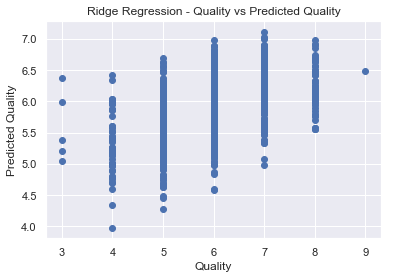

In [73]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Quality")
plt.ylabel("Predicted Quality")
plt.title("Ridge Regression - Quality vs Predicted Quality")

In [74]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ms_errors= cross_val_score(lmr, x, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()

In [75]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)
show_stats('Ridge Regression',rmse ,mean_rms_error)
r2 = cross_val_score(ridge, x,y,cv =5, scoring = make_scorer(r2_score))
print(r2.mean())

Method: Ridge Regression
RMSE on no CV training: 0.760
RMSE on 5-fold CV: 0.762
0.23890973027677406


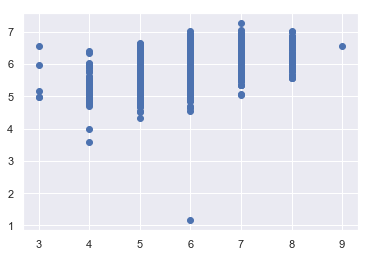

In [76]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)
p = lmr.fit(X_train,y_train)
y_pred = p.predict(X_test)
plt.scatter(y_test, y_pred)

From the above performed ridge regression there wasn't much difference in the accuracy rate that is mean square thus the dataset is very accurate and the models build are perfectly fine.

# <a id='8'>8. Conclusion</a>

**In the above-performed analysis we successfully designed linear models with great accuracy rate with respect logistic regression and very less mean squared error which is close to 0 in case of linear regression, we used the k fold to validate the data train and test, also performed stepwise regression to take away multi colinearity to avoid building faulty models. We used L2 regularization to perform and check if the model for linear regression is rightly build**

****

# <a id='9'>9. Contributions Statement</a>

Approximately 70% of the code was referred from similar Kernel's from kaggle, 30% of the code was manipulated and written by me based on the documentations and citations.

****

# <a id='10'>10. Citations</a>

1. https://www.geeksforgeeks.org/python-for-data-science/ --> Method descriptions
2. https://www.kaggle.com/ananthreddy/red-wine-quality-linear-regression  --> Similar Notebook
3. https://www.kaggle.com/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data --> Similar Notebook used for reference
4. https://mode.com/python-tutorial/pandas-dataframe/     -> Python Documentation 
5. https://seaborn.pydata.org/  ->Seaborn Plots(Documentation)
6. https://www.wikipedia.org/ -> Definitions
7. https://pandas.pydata.org/pandas-docs/stable/ --> Pandas Documentation


****

# <a id='11'>11. License</a>

Copyright 2019 Cassian Gonsalves

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.